<a href="https://colab.research.google.com/github/tmtakashi/machine_learning_notebooks/blob/master/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.layers import Input, Dense
from keras.models import Model

#中間層の次元
encoding_dim = 32 

#入力データ
input_img = Input(shape=(784,))

# 中間層
encoded = Dense(encoding_dim, activation='relu')(input_img)
# 出力層
decoded = Dense(784, activation='sigmoid')(encoded)

# 再構築モデル
autoencoder = Model(input_img, decoded)

In [0]:
# エンコーダーモデル
encoder = Model(input_img, encoded)

In [0]:
encoded_input = Input(shape=(encoding_dim,))

decoder_layer = autoencoder.layers[-1]
# デコーダーモデル
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [0]:
# 再構築モデルをコンパイル
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:
# MNISTの読み込み
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) =  mnist.load_data() # 画像データのみ必要なのでラベルは捨てる

In [0]:
# 正規化
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [0]:
autoencoder.fit(x_train, x_train,
               epochs=50,
               batch_size=256,
               shuffle=True,
               validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 74us/step - loss: 0.3526 - val_loss: 0.2702
Epoch 2/50
60000/60000 [==============================] - 4s 71us/step - loss: 0.2621 - val_loss: 0.2502
Epoch 3/50
60000/60000 [==============================] - 4s 70us/step - loss: 0.2397 - val_loss: 0.2272
Epoch 4/50
60000/60000 [==============================] - 4s 70us/step - loss: 0.2200 - val_loss: 0.2107
Epoch 5/50
60000/60000 [==============================] - 4s 68us/step - loss: 0.2059 - val_loss: 0.1984
Epoch 6/50
60000/60000 [==============================] - 4s 71us/step - loss: 0.1950 - val_loss: 0.1887
Epoch 7/50
60000/60000 [==============================] - 4s 71us/step - loss: 0.1862 - val_loss: 0.1809
Epoch 8/50
60000/60000 [==============================] - 4s 70us/step - loss: 0.1792 - val_loss: 0.1746
Epoch 9/50
60000/60000 [==============================] - 4s 70us/step - loss: 0.1733 - val_loss: 0.1692
Epoch

In [0]:
# テストデータを使って出力を可視化

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

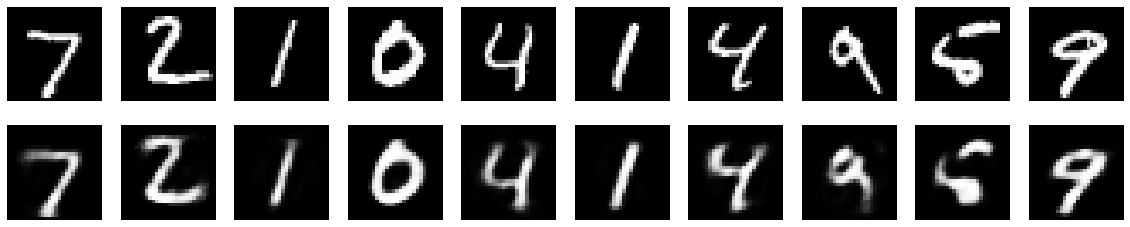

In [0]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  
  #　オリジナル画像
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# この時点では(4, 4, 8)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 8)           0         
__________

In [0]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

# 正規化
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format


print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [0]:
autoencoder.fit(x_train, x_train,
               epochs=50,
               batch_size=128,
               shuffle=True,
               validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 11s 180us/step - loss: 0.2043 - val_loss: 0.1658
Epoch 2/50
60000/60000 [==============================] - 7s 111us/step - loss: 0.1550 - val_loss: 0.1445
Epoch 3/50
60000/60000 [==============================] - 7s 111us/step - loss: 0.1410 - val_loss: 0.1348
Epoch 4/50
60000/60000 [==============================] - 7s 109us/step - loss: 0.1335 - val_loss: 0.1298
Epoch 5/50
60000/60000 [==============================] - 6s 108us/step - loss: 0.1290 - val_loss: 0.1214
Epoch 6/50
60000/60000 [==============================] - 6s 107us/step - loss: 0.1250 - val_loss: 0.1211
Epoch 7/50
60000/60000 [==============================] - 6s 106us/step - loss: 0.1224 - val_loss: 0.1184
Epoch 8/50
60000/60000 [==============================] - 6s 106us/step - loss: 0.1199 - val_loss: 0.1174
Epoch 9/50
60000/60000 [==============================] - 6s 106us/step - loss: 0.1182 - val_loss: 0.

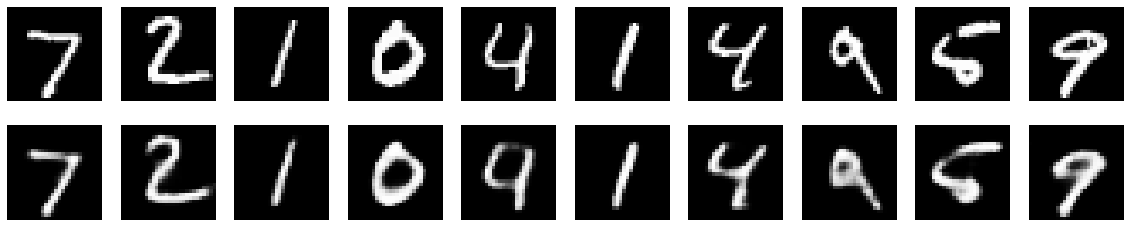

In [0]:
import matplotlib.pyplot as plt

decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  
  #　オリジナル画像
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()